# Messages

In [96]:
import pandas as pd
import numpy as np

datamessages = pd.read_csv('/Users/constantinwiederin/Documents/IE/Algorithmic Trading/LOBSTER/AAPL_2012-06-21_34200000_57600000_message_10.csv', header=None)

In [97]:
datamessages.shape

(400391, 6)

In [98]:
datamessages.columns = ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction']

In [99]:
datamessages.head()


,Time,Type,OrderID,Size,Price,Direction
0,34200.004241,1,16113575,18,5853300,1
1,34200.004261,1,16113584,18,5853200,1
2,34200.004447,1,16113594,18,5853100,1
3,34200.025552,1,16120456,18,5859100,-1
4,34200.025580,1,16120480,18,5859200,-1


In [100]:
#Showing the number of entries by direction
datamessages['Direction'] = datamessages['Direction'].replace({-1: 'Sell limit order', 1: 'Buy limit order'})


# Orderbook

In [101]:
dataorderbook = pd.read_csv('/Users/constantinwiederin/Documents/IE/Algorithmic Trading/LOBSTER/AAPL_2012-06-21_34200000_57600000_orderbook_10.csv', header=None) 
dataorderbook.shape

(400391, 40)

In [102]:
dataorderbook.columns = ['Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1', 'Ask Price 2', 'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3', 'Ask Size 3', 'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4', 'Bid Price 4', 'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5', 'Bid Size 5', 'Ask price 6', 'Ask Size 6', 'Bid Price 6', 'Bid Size 6', 'Ask Price 7', 'Ask Size 7', 'Bid Price 7', 'Bid Size 7', 'Ask Price 8', 'Ask Size 8', 'Bid Price 8', 'Bid Size 8', 'Ask Price 9', 'Ask Size 9', 'Bid Price 9', 'Bid Size 9', 'Ask Price 10', 'Ask Size 10', 'Bid Price 10', 'Bid Size 10']

In [103]:
dataorderbook.head()

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5845300,300,5876500,1160,5843800,200,5879000,500,5842700,300
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5846500,300,5876500,1160,5845300,300,5879000,500,5843800,200
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5849300,300,5876500,1160,5846500,300,5879000,500,5845300,300
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5849300,300,5873900,100,5846500,300,5876500,1160,5845300,300
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5849300,300,5871000,10,5846500,300,5873900,100,5845300,300


In [104]:
dataorderbook['Time'] = datamessages['Time']

In [105]:
#merging the two datasets on the time column
data = pd.merge(datamessages, dataorderbook, on='Time')

In [106]:
#remove type type 5 entries
data = data[data['Type'] != 5]

In [107]:
data['midprice'] = (data['Ask Price 1'] + data['Bid Price 1']) / 2

In [108]:
data['Calc_direction'] = np.where(data['midprice']<data['Price'], 'Buy', 'Sell')

In [109]:
data2 = data

In [110]:
#group the data by hour and
data2['Time'] = pd.to_datetime(data2['Time'], unit='s')
data2['Time'] = data2['Time'].dt.floor('H')
data2['Time'] = data2['Time'].dt.time

data2 = data2.groupby(['Time','Direction','Type']).sum().reset_index()

/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_3310/68276651.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data2['Time'] = data2['Time'].dt.floor('H')


In [111]:
data2.head()

,Time,Direction,Type,OrderID,Size,Price,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,...,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10,midprice,Calc_direction
0,09:00:00,Buy limit order,1,239146384450,724860,45094518200,45117810900,1210350,45100240500,940314,...,45145553800,1867204,45064744200,2066967,45149567700,2168692,45060685100,2135226,4.510903e+10,SellSellSellSellSellSellSellSellSellSellSellSe...
1,09:00:00,Buy limit order,2,2368773339,8105,480623800,480918900,11278,480712900,14475,...,481232500,23071,480266400,17442,481273500,18895,480215700,19406,4.808159e+08,SellSellSellSellSellSellSellSellSellSellSellSe...
2,09:00:00,Buy limit order,3,216535804385,642296,40001721700,40023465000,1082987,40007315300,957563,...,40046735200,1636845,39973370000,1975501,40049780700,1969983,39969782300,1895677,4.001539e+10,SellSellSellSellSellSellSellSellSellSellSellSe...
3,09:00:00,Buy limit order,4,48528007317,145608,10179777700,10182299000,247399,10179246000,719946,...,10189891500,353204,10171643900,495233,10190781000,373530,10170953200,408754,1.018077e+10,SellSellSellSellSellSellSellSellSellSellSellSe...
4,09:00:00,Sell limit order,1,340646800817,1104756,63549467900,63542693600,1480270,63518648900,1555134,...,63582788900,2296466,63474862500,3274572,63589387700,3037117,63469749700,3007889,6.353067e+10,BuyBuyBuyBuySellBuyBuyBuyBuyBuyBuyBuyBuyBuyBuy...


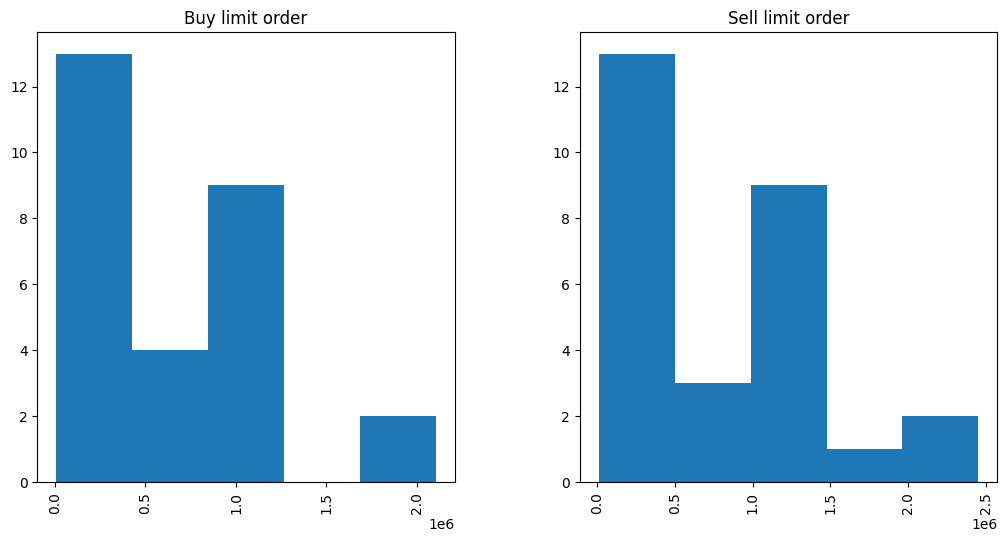

In [117]:
#show the distribution in a histogram(Number of orders on y and size of orders on x) of the size of the orders for the first hour
import matplotlib.pyplot as plt

data2['Size'].hist(by=data2['Direction'], bins=5, figsize=(12, 6))
plt.show()

